In [7]:
import bagpy
from bagpy import bagreader
import pandas as pd
import seaborn as sea
import matplotlib.pyplot as plt
import numpy as np
import math
import statistics

## data stored to b
b = bagreader('stationary_ocluded.bag')
b2 = bagreader('walking_occluded.bag')
#shows a table of all topics with information of how many msgs in them
print(b.topic_table)

[INFO]  Data folder stationary_ocluded already exists. Not creating.
[INFO]  Data folder walking_occluded already exists. Not creating.
  Topics               Types  Message Count  Frequency
0   /gps  gps_driver/gps_msg            609   0.999922


In [8]:
# saving to csv
st= b.message_by_topic(topic='/gps')
walker = b2.message_by_topic(topic='/gps')
stand = pd.read_csv(st)
walk = pd.read_csv(walker)

,Time,Header.seq,Header.stamp.secs,Header.stamp.nsecs,Header.frame_id,Latitude,Longitude,Altitude,UTM_easting,UTM_northing,Zone,Quality,Letter
0,1.665425e+09,1447,65178,0,GPS1_Frame,42.338838,-70.911773,11.5,4.689168e+06,342511.468778,19,4,T
1,1.665425e+09,1448,65179,0,GPS1_Frame,42.338841,-70.911780,11.5,4.689168e+06,342510.899599,19,4,T
2,1.665425e+09,1449,65180,0,GPS1_Frame,42.338844,-70.911788,11.5,4.689169e+06,342510.235557,19,4,T
3,1.665425e+09,1450,65181,0,GPS1_Frame,42.338848,-70.911798,11.4,4.689169e+06,342509.476236,19,4,T
4,1.665425e+09,1451,65182,0,GPS1_Frame,42.338853,-70.911806,11.6,4.689170e+06,342508.787646,19,4,T
...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,1.665425e+09,1518,65249,0,GPS1_Frame,42.338837,-70.911772,11.7,4.689168e+06,342511.591101,19,4,T
72,1.665425e+09,1519,65250,0,GPS1_Frame,42.338838,-70.911772,11.6,4.689168e+06,342511.523699,19,4,T
73,1.665425e+09,1520,65251,0,GPS1_Frame,42.338838,-70.911772,11.6,4.689168e+06,342511.524115,19,4,T
74,1.665425e+09,1521,65252,0,GPS1_Frame,42.338838,-70.911772,11.6,4.689168e+06,342511.537429,19,4,T


Stationary Data

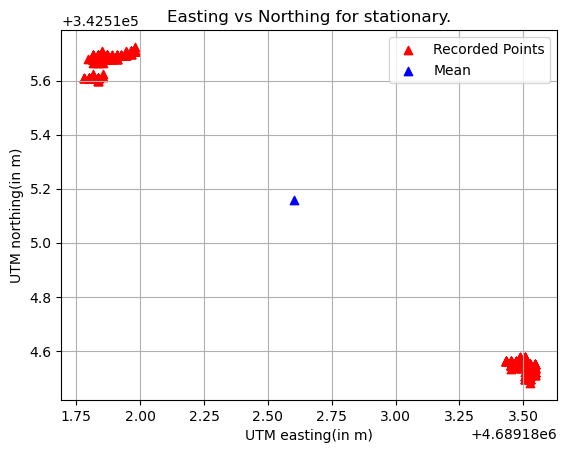

In [9]:
# plotting
plt.scatter(stand['UTM_easting'],stand['UTM_northing'], marker='^', color='r', label='Recorded Points')
plt.scatter(statistics.mean(stand['UTM_easting']),statistics.mean(stand['UTM_northing']), color='b', marker='^', label='Mean')
plt.ylabel('UTM northing(in m)')
plt.xlabel('UTM easting(in m)')
plt.title('Easting vs Northing for stationary.')
plt.grid()
plt.legend()
plt.show()


In [42]:
import statistics
m1 = statistics.mean(stand['UTM_northing'])
m2 = statistics.mean(stand['UTM_easting'])
print("Mean of UTM_northing values gives", m1,"\n","Mean of UTM_Easting values gives",m2,"\n")

from sklearn.metrics import mean_squared_error
from math import sqrt
mn = stand['UTM_northing'].copy()
mn1=mn.copy()
mn[:] = m1
mse = mean_squared_error(mn, mn1)
mn2 = stand['UTM_easting'].copy()
mn3=mn2.copy()
mn2[:] = m2
mse2 = mean_squared_error(mn2, mn3)
print("MSE for utm_northing is", mse,"MSE for utm_easting is", mse2,"\n")
print("RMSE for utm_northing is", math.sqrt(mse),"RMSE for utm_easting is", math.sqrt(mse2))

Mean of UTM_northing values gives 342515.15960356913 
 Mean of UTM_Easting values gives 4689182.600897777 

MSE for utm_northing is 0.31952503153811324 MSE for utm_easting is 0.6718162827448294 

RMSE for utm_northing is 0.5652654522771697 RMSE for utm_easting is 0.8196439975653024


Mean of altitude is 8.820361247947455


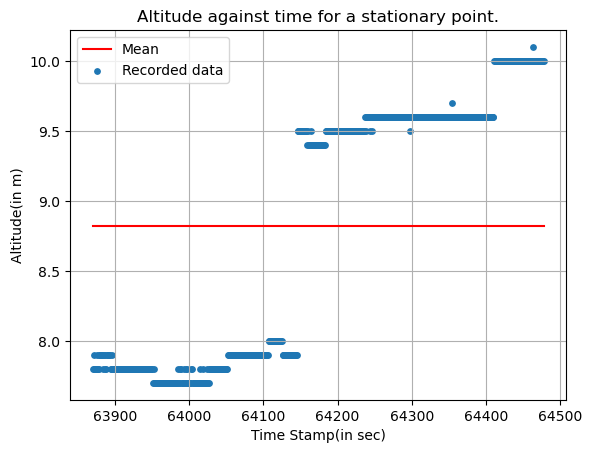

In [51]:
m1 = statistics.mean(stand['Altitude'])
print("Mean of altitude is",m1)
mn = stand['Altitude'].copy()
mn1=mn.copy()
mn[:] = m1

plt.scatter(stand['Header.stamp.secs'],stand['Altitude'], s=15, label='Recorded data')
plt.plot(stand['Header.stamp.secs'],mn, color='r', label='Mean')
plt.ylabel('Altitude(in m)')
plt.xlabel('Time Stamp(in sec)')
plt.title('Altitude against time for a stationary point.')
plt.legend()
plt.grid()

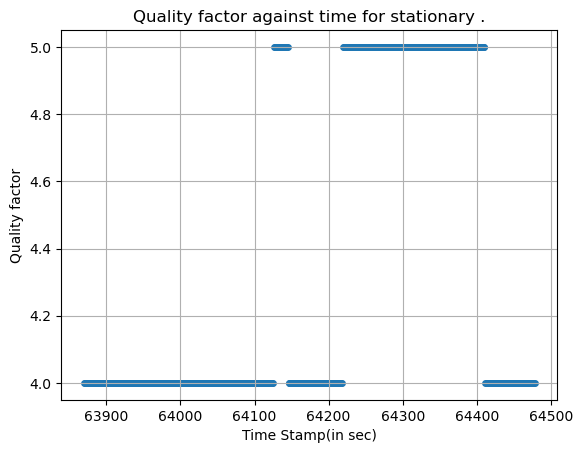

In [13]:
plt.scatter(stand['Header.stamp.secs'],stand['Quality'], s=15)
plt.ylabel('Quality factor')
plt.xlabel('Time Stamp(in sec)')
plt.title('Quality factor against time for stationary .')
plt.grid()

Moving Data

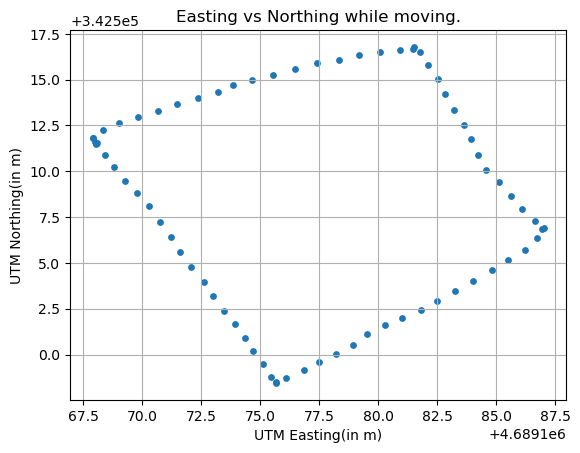

In [14]:
# plotting
plt.scatter(walk['UTM_easting'],walk['UTM_northing'], s=15)
plt.ylabel('UTM Northing(in m)')
plt.xlabel('UTM Easting(in m)')
plt.title('Easting vs Northing while moving.')
plt.grid()

Plotting lines of travel for error estimation (assuming that the actual path was traversed in a straight line)

In [15]:
def distError(c1, c2, slicedDf):
    
    errList=[]
    
    for _, row in slicedDf.iterrows():
        x, y = row["UTM_easting"], row["UTM_northing"]

        p1 = np.array([c1["UTM_easting"], c1["UTM_northing"]])
        p2 = np.array([c2["UTM_easting"], c2["UTM_northing"]])
        p3 = np.array([x, y])

        d = np.abs(np.cross(p2-p1, p3-p1))/norm(p2-p1)
        errList.append(d)       
        
    return errList

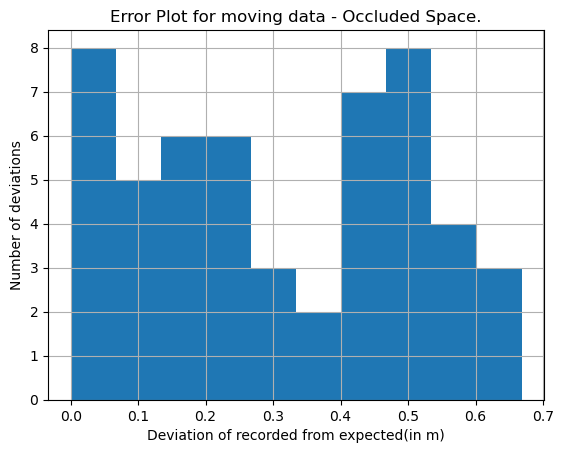

In [24]:
from numpy.linalg import norm
# 1st corner
c1 = walk.iloc[walk["UTM_easting"].idxmin(),:]

# 2nd corner of the loop
c2 = walk.iloc[walk["UTM_northing"].idxmin(),:]

# 3rd corner
c3 = walk.iloc[walk["UTM_easting"].idxmax(), :]

# 4th corner
c4 = walk.iloc[walk["UTM_northing"].idxmax(), :]

start1 = min(walk["UTM_easting"].idxmin(), walk["UTM_northing"].idxmin())
end1 = max(walk["UTM_easting"].idxmin(), walk["UTM_northing"].idxmin())

start2 = min(walk["UTM_northing"].idxmin(), walk["UTM_easting"].idxmax())
end2 = max(walk["UTM_northing"].idxmin(), walk["UTM_easting"].idxmax())

start3 = min(walk["UTM_easting"].idxmax(), walk["UTM_northing"].idxmax())
end3 = max(walk["UTM_easting"].idxmax(), walk["UTM_northing"].idxmax())

start4 = min(walk["UTM_northing"].idxmax(), walk["UTM_easting"].idxmin())
end4 = max(walk["UTM_northing"].idxmax(), walk["UTM_easting"].idxmin())

slicedDf_1 = walk.iloc[start1:end1, :]
slicedDf_2 = walk.iloc[start2:end2, :]
slicedDf_3 = walk.iloc[start3:end3, :]
slicedDf_4 = walk.iloc[start4:end4, :]

errList1 = distError(c1, c2, slicedDf_1)
errList2 = distError(c2, c3, slicedDf_2)
errList3 = distError(c3, c4, slicedDf_3)
errList4 = distError(c4, c1, slicedDf_4)

## The errors calculated for the first edge seems to have come out wrong with values of upto ( 14 m ) which cannot be seen in the graph. 
# Hence, it has not been considered in the histogram plot for the report.

errListTotal = errList4 + errList2 + errList3
plt.hist(errListTotal)
plt.ylabel('Number of deviations')
plt.xlabel('Deviation of recorded from expected(in m)')
plt.title('Error Plot for moving data - Occluded Space.')
plt.grid()


In [54]:
## Calculation for mse and rmse for moving data

errListTotal = errList4 + errList2 + errList3
se = []
for err in errListTotal:
    se.append(err**2)
mse = statistics.mean(se)
rmse = math.sqrt(mse)
print("Mean Squared error is ", mse, " and rmse is", rmse)

Mean Squared error is  0.13574251392872191  and rmse is 0.36843250932663624


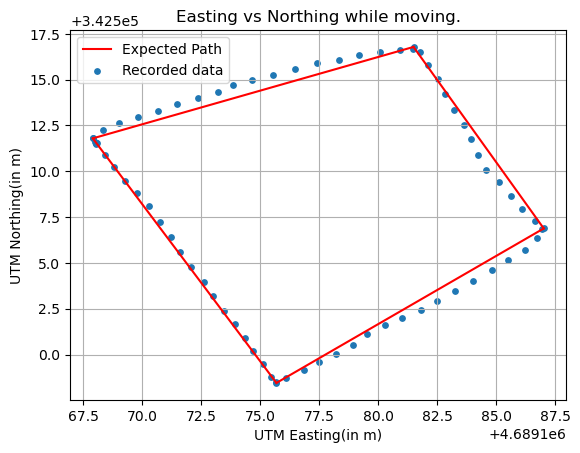

In [53]:
## Plotted the moving plot with straight lines for comparison
xvals1 = [c1["UTM_easting"], c2["UTM_easting"]]
yvals1 = [c1["UTM_northing"], c2["UTM_northing"]]
xvals2 = [c2["UTM_easting"], c3["UTM_easting"]]
yvals2 = [c2["UTM_northing"], c3["UTM_northing"]]
xvals3 = [c3["UTM_easting"], c4["UTM_easting"]]
yvals3 = [c3["UTM_northing"], c4["UTM_northing"]]
xvals4 = [c4["UTM_easting"], c1["UTM_easting"]]
yvals4 = [c4["UTM_northing"], c1["UTM_northing"]]


plt.scatter(walk['UTM_easting'],walk['UTM_northing'], s=15, label="Recorded data")
plt.plot(xvals1, yvals1, color='r', label = "Expected Path")
plt.plot(xvals2, yvals2, color='r')
plt.plot(xvals3, yvals3, color='r')
plt.plot(xvals4, yvals4, color='r')
plt.ylabel('UTM Northing(in m)')
plt.xlabel('UTM Easting(in m)')
plt.title('Easting vs Northing while moving.')
plt.legend()
plt.grid()


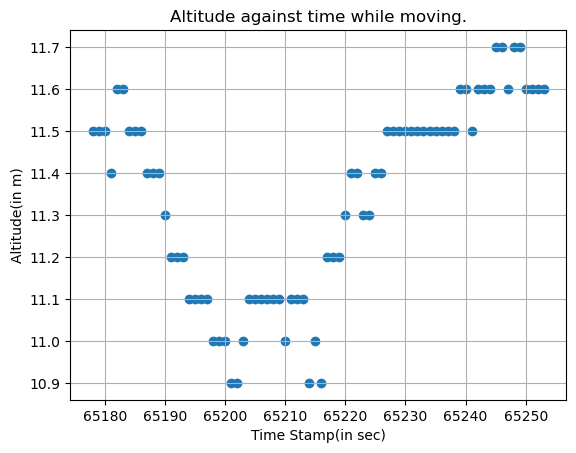

In [22]:
#Altitude for the moving data in occluded space

plt.scatter(walk['Header.stamp.secs'],walk['Altitude'])
plt.ylabel('Altitude(in m)')
plt.xlabel('Time Stamp(in sec)')
plt.title('Altitude against time while moving.')
plt.grid()

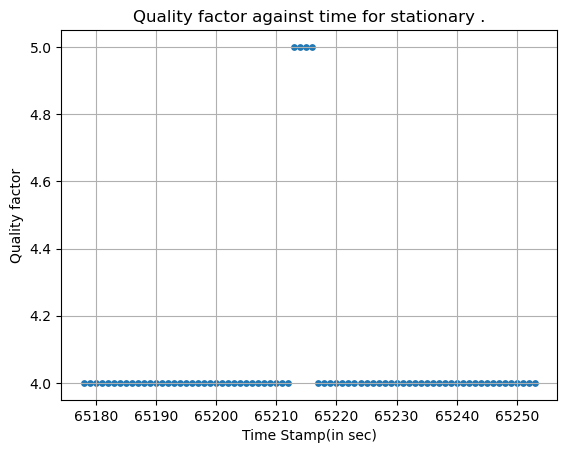

In [19]:
plt.scatter(walk['Header.stamp.secs'],walk['Quality'], s=15)
plt.ylabel('Quality factor')
plt.xlabel('Time Stamp(in sec)')
plt.title('Quality factor against time for stationary .')
plt.grid() 